[View in Colaboratory](https://colab.research.google.com/github/zzune/KerasBasic/blob/master/Chapter3_1_history.ipynb)

In [1]:
#0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

Using TensorFlow backend.


In [2]:
#1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리
x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋과 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)
x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

# 라벨데이터 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
#2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [0]:
#3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [6]:
#4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=1000, batch_size=10, validation_data=(x_val, y_val))

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 1s 2ms/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/1000
700/700 [==============================] - 0s 459us/step - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/1000
700/700 [==============================] - 0s 474us/step - loss: 2.1730 - acc: 0.1729 - val_loss: 2.1631 - val_acc: 0.1867
Epoch 4/1000
700/700 [==============================] - 0s 568us/step - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1372 - val_acc: 0.1867
Epoch 5/1000
700/700 [==============================] - 0s 569us/step - loss: 2.1177 - acc: 0.1900 - val_loss: 2.1141 - val_acc: 0.1867
Epoch 6/1000
700/700 [==============================] - 0s 467us/step - loss: 2.0940 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/1000
700/700 [==============================] - 0s 465us/step - loss: 2.0721 - acc: 0.2071 - val_loss: 2.0727 - val_acc: 0.2067
Epoc

700/700 [==============================] - 0s 562us/step - loss: 1.9685 - acc: 0.2329 - val_loss: 1.9833 - val_acc: 0.2067
Epoch 15/1000
700/700 [==============================] - 0s 569us/step - loss: 1.9582 - acc: 0.2214 - val_loss: 1.9753 - val_acc: 0.2100
Epoch 16/1000
700/700 [==============================] - 0s 555us/step - loss: 1.9484 - acc: 0.2357 - val_loss: 1.9686 - val_acc: 0.2000
Epoch 17/1000
700/700 [==============================] - 0s 553us/step - loss: 1.9393 - acc: 0.2343 - val_loss: 1.9612 - val_acc: 0.2033
Epoch 18/1000
700/700 [==============================] - 0s 566us/step - loss: 1.9309 - acc: 0.2314 - val_loss: 1.9537 - val_acc: 0.2100
Epoch 19/1000
700/700 [==============================] - 0s 578us/step - loss: 1.9232 - acc: 0.2286 - val_loss: 1.9452 - val_acc: 0.2100
Epoch 20/1000
700/700 [==============================] - 0s 595us/step - loss: 1.9156 - acc: 0.2386 - val_loss: 1.9392 - val_acc: 0.2100
Epoch 21/1000
700/700 [==============================] 

700/700 [==============================] - 0s 564us/step - loss: 1.8715 - acc: 0.2357 - val_loss: 1.9098 - val_acc: 0.2167
Epoch 28/1000
700/700 [==============================] - 0s 556us/step - loss: 1.8662 - acc: 0.2400 - val_loss: 1.9094 - val_acc: 0.2000
Epoch 29/1000
700/700 [==============================] - 0s 562us/step - loss: 1.8615 - acc: 0.2400 - val_loss: 1.9041 - val_acc: 0.1900
Epoch 30/1000
700/700 [==============================] - 0s 559us/step - loss: 1.8565 - acc: 0.2243 - val_loss: 1.8976 - val_acc: 0.2167
Epoch 31/1000
700/700 [==============================] - 0s 582us/step - loss: 1.8513 - acc: 0.2471 - val_loss: 1.8971 - val_acc: 0.1933
Epoch 32/1000
700/700 [==============================] - 0s 593us/step - loss: 1.8463 - acc: 0.2371 - val_loss: 1.8925 - val_acc: 0.1900
Epoch 33/1000
700/700 [==============================] - 0s 566us/step - loss: 1.8423 - acc: 0.2229 - val_loss: 1.8874 - val_acc: 0.2067
Epoch 34/1000
700/700 [==============================] 

700/700 [==============================] - 0s 531us/step - loss: 1.8144 - acc: 0.2314 - val_loss: 1.8677 - val_acc: 0.2000
Epoch 41/1000
700/700 [==============================] - 0s 556us/step - loss: 1.8105 - acc: 0.2400 - val_loss: 1.8668 - val_acc: 0.1833
Epoch 42/1000
700/700 [==============================] - 0s 579us/step - loss: 1.8075 - acc: 0.2471 - val_loss: 1.8635 - val_acc: 0.1800
Epoch 43/1000
700/700 [==============================] - 0s 574us/step - loss: 1.8046 - acc: 0.2429 - val_loss: 1.8611 - val_acc: 0.1700
Epoch 44/1000
700/700 [==============================] - 0s 585us/step - loss: 1.8001 - acc: 0.2371 - val_loss: 1.8566 - val_acc: 0.1967
Epoch 45/1000
700/700 [==============================] - 0s 570us/step - loss: 1.7970 - acc: 0.2429 - val_loss: 1.8564 - val_acc: 0.1700
Epoch 46/1000
700/700 [==============================] - 0s 559us/step - loss: 1.7939 - acc: 0.2271 - val_loss: 1.8528 - val_acc: 0.1933
Epoch 47/1000
700/700 [==============================] 

700/700 [==============================] - 0s 588us/step - loss: 1.7744 - acc: 0.2514 - val_loss: 1.8486 - val_acc: 0.2000
Epoch 54/1000
700/700 [==============================] - 0s 564us/step - loss: 1.7716 - acc: 0.2700 - val_loss: 1.8472 - val_acc: 0.1800
Epoch 55/1000
700/700 [==============================] - 0s 570us/step - loss: 1.7687 - acc: 0.2500 - val_loss: 1.8364 - val_acc: 0.2033
Epoch 56/1000
700/700 [==============================] - 0s 563us/step - loss: 1.7672 - acc: 0.2543 - val_loss: 1.8430 - val_acc: 0.2200
Epoch 57/1000
700/700 [==============================] - 0s 568us/step - loss: 1.7641 - acc: 0.2714 - val_loss: 1.8390 - val_acc: 0.2167
Epoch 58/1000
700/700 [==============================] - 0s 554us/step - loss: 1.7616 - acc: 0.2557 - val_loss: 1.8347 - val_acc: 0.2267
Epoch 59/1000
700/700 [==============================] - 0s 558us/step - loss: 1.7590 - acc: 0.2671 - val_loss: 1.8329 - val_acc: 0.2233
Epoch 60/1000
700/700 [==============================] 

700/700 [==============================] - 0s 581us/step - loss: 1.7439 - acc: 0.2786 - val_loss: 1.8296 - val_acc: 0.2067
Epoch 67/1000
700/700 [==============================] - 0s 582us/step - loss: 1.7419 - acc: 0.2700 - val_loss: 1.8299 - val_acc: 0.2067
Epoch 68/1000
700/700 [==============================] - 0s 558us/step - loss: 1.7405 - acc: 0.2729 - val_loss: 1.8238 - val_acc: 0.2000
Epoch 69/1000
700/700 [==============================] - 0s 556us/step - loss: 1.7376 - acc: 0.2814 - val_loss: 1.8298 - val_acc: 0.2167
Epoch 70/1000
700/700 [==============================] - 0s 565us/step - loss: 1.7356 - acc: 0.2857 - val_loss: 1.8269 - val_acc: 0.2433
Epoch 71/1000
700/700 [==============================] - 0s 530us/step - loss: 1.7345 - acc: 0.2800 - val_loss: 1.8214 - val_acc: 0.2167
Epoch 72/1000
700/700 [==============================] - 0s 559us/step - loss: 1.7328 - acc: 0.2857 - val_loss: 1.8226 - val_acc: 0.2133
Epoch 73/1000
700/700 [==============================] 

700/700 [==============================] - 0s 572us/step - loss: 1.7199 - acc: 0.2829 - val_loss: 1.8203 - val_acc: 0.2433
Epoch 80/1000
700/700 [==============================] - 0s 554us/step - loss: 1.7188 - acc: 0.2929 - val_loss: 1.8197 - val_acc: 0.2067
Epoch 81/1000
700/700 [==============================] - 0s 583us/step - loss: 1.7165 - acc: 0.2843 - val_loss: 1.8256 - val_acc: 0.2067
Epoch 82/1000
700/700 [==============================] - 0s 565us/step - loss: 1.7142 - acc: 0.2829 - val_loss: 1.8144 - val_acc: 0.2667
Epoch 83/1000
700/700 [==============================] - 0s 559us/step - loss: 1.7132 - acc: 0.2857 - val_loss: 1.8190 - val_acc: 0.2400
Epoch 84/1000
700/700 [==============================] - 0s 566us/step - loss: 1.7127 - acc: 0.2986 - val_loss: 1.8220 - val_acc: 0.2167
Epoch 85/1000
700/700 [==============================] - 0s 569us/step - loss: 1.7097 - acc: 0.2971 - val_loss: 1.8159 - val_acc: 0.2267
Epoch 86/1000
700/700 [==============================] 

700/700 [==============================] - 0s 556us/step - loss: 1.6987 - acc: 0.3129 - val_loss: 1.8215 - val_acc: 0.2067
Epoch 93/1000
700/700 [==============================] - 0s 583us/step - loss: 1.6980 - acc: 0.3071 - val_loss: 1.8173 - val_acc: 0.2767
Epoch 94/1000
700/700 [==============================] - 0s 568us/step - loss: 1.6970 - acc: 0.3157 - val_loss: 1.8176 - val_acc: 0.2100
Epoch 95/1000
700/700 [==============================] - 0s 573us/step - loss: 1.6943 - acc: 0.2986 - val_loss: 1.8194 - val_acc: 0.2833
Epoch 96/1000
700/700 [==============================] - 0s 553us/step - loss: 1.6948 - acc: 0.3014 - val_loss: 1.8095 - val_acc: 0.2233
Epoch 97/1000
700/700 [==============================] - 0s 595us/step - loss: 1.6930 - acc: 0.3057 - val_loss: 1.8228 - val_acc: 0.2300
Epoch 98/1000
700/700 [==============================] - 0s 563us/step - loss: 1.6921 - acc: 0.3043 - val_loss: 1.8117 - val_acc: 0.2200
Epoch 99/1000
700/700 [==============================] 

700/700 [==============================] - 0s 585us/step - loss: 1.6821 - acc: 0.3071 - val_loss: 1.8063 - val_acc: 0.2067
Epoch 106/1000
700/700 [==============================] - 0s 569us/step - loss: 1.6814 - acc: 0.3114 - val_loss: 1.8173 - val_acc: 0.2200
Epoch 107/1000
700/700 [==============================] - 0s 549us/step - loss: 1.6805 - acc: 0.3071 - val_loss: 1.8228 - val_acc: 0.2367
Epoch 108/1000
700/700 [==============================] - 0s 588us/step - loss: 1.6784 - acc: 0.3071 - val_loss: 1.8167 - val_acc: 0.2767
Epoch 109/1000
700/700 [==============================] - 0s 562us/step - loss: 1.6782 - acc: 0.3143 - val_loss: 1.8178 - val_acc: 0.2300
Epoch 110/1000
700/700 [==============================] - 0s 580us/step - loss: 1.6775 - acc: 0.3171 - val_loss: 1.8147 - val_acc: 0.2133
Epoch 111/1000
700/700 [==============================] - 0s 571us/step - loss: 1.6775 - acc: 0.3043 - val_loss: 1.8173 - val_acc: 0.2233
Epoch 112/1000
700/700 [=========================

Epoch 118/1000
700/700 [==============================] - 0s 559us/step - loss: 1.6682 - acc: 0.3114 - val_loss: 1.8262 - val_acc: 0.2333
Epoch 119/1000
700/700 [==============================] - 0s 571us/step - loss: 1.6670 - acc: 0.3257 - val_loss: 1.8216 - val_acc: 0.2200
Epoch 120/1000
700/700 [==============================] - 0s 561us/step - loss: 1.6661 - acc: 0.3129 - val_loss: 1.8219 - val_acc: 0.2200
Epoch 121/1000
700/700 [==============================] - 0s 571us/step - loss: 1.6646 - acc: 0.3071 - val_loss: 1.8132 - val_acc: 0.2233
Epoch 122/1000
700/700 [==============================] - 0s 579us/step - loss: 1.6637 - acc: 0.3229 - val_loss: 1.8194 - val_acc: 0.2200
Epoch 123/1000
700/700 [==============================] - 0s 549us/step - loss: 1.6629 - acc: 0.3100 - val_loss: 1.8139 - val_acc: 0.2200
Epoch 124/1000
700/700 [==============================] - 0s 569us/step - loss: 1.6619 - acc: 0.3143 - val_loss: 1.8187 - val_acc: 0.2267
Epoch 125/1000
700/700 [==========

700/700 [==============================] - 0s 573us/step - loss: 1.6547 - acc: 0.3229 - val_loss: 1.8202 - val_acc: 0.2500
Epoch 132/1000
700/700 [==============================] - 0s 572us/step - loss: 1.6545 - acc: 0.3200 - val_loss: 1.8133 - val_acc: 0.2267
Epoch 133/1000
700/700 [==============================] - 0s 584us/step - loss: 1.6524 - acc: 0.3143 - val_loss: 1.8317 - val_acc: 0.2400
Epoch 134/1000
700/700 [==============================] - 0s 577us/step - loss: 1.6514 - acc: 0.3214 - val_loss: 1.8226 - val_acc: 0.2733
Epoch 135/1000
700/700 [==============================] - 0s 571us/step - loss: 1.6512 - acc: 0.3314 - val_loss: 1.8233 - val_acc: 0.2267
Epoch 136/1000
700/700 [==============================] - 0s 580us/step - loss: 1.6493 - acc: 0.3186 - val_loss: 1.8168 - val_acc: 0.2200
Epoch 137/1000
700/700 [==============================] - 0s 575us/step - loss: 1.6483 - acc: 0.3214 - val_loss: 1.8191 - val_acc: 0.2200
Epoch 138/1000
700/700 [=========================

700/700 [==============================] - 0s 583us/step - loss: 1.6431 - acc: 0.3329 - val_loss: 1.8273 - val_acc: 0.2300
Epoch 145/1000
700/700 [==============================] - 0s 574us/step - loss: 1.6419 - acc: 0.3271 - val_loss: 1.8197 - val_acc: 0.2200
Epoch 146/1000
700/700 [==============================] - 0s 552us/step - loss: 1.6392 - acc: 0.3343 - val_loss: 1.8324 - val_acc: 0.2233
Epoch 147/1000
700/700 [==============================] - 0s 564us/step - loss: 1.6412 - acc: 0.3100 - val_loss: 1.8328 - val_acc: 0.2333
Epoch 148/1000
700/700 [==============================] - 0s 551us/step - loss: 1.6390 - acc: 0.3243 - val_loss: 1.8306 - val_acc: 0.2500
Epoch 149/1000
700/700 [==============================] - 0s 558us/step - loss: 1.6375 - acc: 0.3271 - val_loss: 1.8189 - val_acc: 0.2133
Epoch 150/1000
700/700 [==============================] - 0s 572us/step - loss: 1.6367 - acc: 0.3229 - val_loss: 1.8276 - val_acc: 0.2233
Epoch 151/1000
700/700 [=========================

700/700 [==============================] - 0s 555us/step - loss: 1.6308 - acc: 0.3300 - val_loss: 1.8241 - val_acc: 0.2200
Epoch 158/1000
700/700 [==============================] - 0s 563us/step - loss: 1.6308 - acc: 0.3343 - val_loss: 1.8329 - val_acc: 0.2300
Epoch 159/1000
700/700 [==============================] - 0s 574us/step - loss: 1.6285 - acc: 0.3257 - val_loss: 1.8336 - val_acc: 0.2433
Epoch 160/1000
700/700 [==============================] - 0s 568us/step - loss: 1.6278 - acc: 0.3300 - val_loss: 1.8304 - val_acc: 0.2233
Epoch 161/1000
700/700 [==============================] - 0s 562us/step - loss: 1.6271 - acc: 0.3257 - val_loss: 1.8406 - val_acc: 0.2300
Epoch 162/1000
700/700 [==============================] - 0s 564us/step - loss: 1.6265 - acc: 0.3271 - val_loss: 1.8350 - val_acc: 0.2267
Epoch 163/1000
700/700 [==============================] - 0s 553us/step - loss: 1.6254 - acc: 0.3371 - val_loss: 1.8365 - val_acc: 0.2300
Epoch 164/1000
700/700 [=========================

700/700 [==============================] - 0s 571us/step - loss: 1.6191 - acc: 0.3371 - val_loss: 1.8369 - val_acc: 0.2233
Epoch 171/1000
700/700 [==============================] - 0s 569us/step - loss: 1.6170 - acc: 0.3271 - val_loss: 1.8517 - val_acc: 0.2600
Epoch 172/1000
700/700 [==============================] - 0s 566us/step - loss: 1.6164 - acc: 0.3386 - val_loss: 1.8397 - val_acc: 0.2133
Epoch 173/1000
700/700 [==============================] - 0s 561us/step - loss: 1.6182 - acc: 0.3386 - val_loss: 1.8392 - val_acc: 0.2367
Epoch 174/1000
700/700 [==============================] - 0s 568us/step - loss: 1.6167 - acc: 0.3300 - val_loss: 1.8420 - val_acc: 0.2200
Epoch 175/1000
700/700 [==============================] - 0s 558us/step - loss: 1.6166 - acc: 0.3357 - val_loss: 1.8406 - val_acc: 0.2200
Epoch 176/1000
700/700 [==============================] - 0s 555us/step - loss: 1.6143 - acc: 0.3229 - val_loss: 1.8437 - val_acc: 0.2600
Epoch 177/1000
700/700 [=========================

700/700 [==============================] - 0s 568us/step - loss: 1.6115 - acc: 0.3300 - val_loss: 1.8411 - val_acc: 0.2333
Epoch 184/1000
700/700 [==============================] - 0s 568us/step - loss: 1.6093 - acc: 0.3443 - val_loss: 1.8453 - val_acc: 0.2267
Epoch 185/1000
700/700 [==============================] - 0s 568us/step - loss: 1.6076 - acc: 0.3386 - val_loss: 1.8641 - val_acc: 0.2200
Epoch 186/1000
700/700 [==============================] - 0s 567us/step - loss: 1.6086 - acc: 0.3443 - val_loss: 1.8449 - val_acc: 0.2233
Epoch 187/1000
700/700 [==============================] - 0s 557us/step - loss: 1.6065 - acc: 0.3543 - val_loss: 1.8442 - val_acc: 0.2167
Epoch 188/1000
700/700 [==============================] - 0s 566us/step - loss: 1.6075 - acc: 0.3386 - val_loss: 1.8412 - val_acc: 0.2133
Epoch 189/1000
700/700 [==============================] - 0s 576us/step - loss: 1.6045 - acc: 0.3529 - val_loss: 1.8517 - val_acc: 0.2233
Epoch 190/1000
700/700 [=========================

700/700 [==============================] - 0s 556us/step - loss: 1.6016 - acc: 0.3514 - val_loss: 1.8472 - val_acc: 0.2167
Epoch 197/1000
700/700 [==============================] - 0s 574us/step - loss: 1.6002 - acc: 0.3443 - val_loss: 1.8488 - val_acc: 0.2300
Epoch 198/1000
700/700 [==============================] - 0s 579us/step - loss: 1.6005 - acc: 0.3386 - val_loss: 1.8591 - val_acc: 0.2200
Epoch 199/1000
700/700 [==============================] - 0s 548us/step - loss: 1.6003 - acc: 0.3429 - val_loss: 1.8558 - val_acc: 0.2200
Epoch 200/1000
700/700 [==============================] - 0s 563us/step - loss: 1.5975 - acc: 0.3457 - val_loss: 1.8604 - val_acc: 0.2633
Epoch 201/1000
700/700 [==============================] - 0s 554us/step - loss: 1.5986 - acc: 0.3457 - val_loss: 1.8469 - val_acc: 0.2167
Epoch 202/1000
700/700 [==============================] - 0s 566us/step - loss: 1.5979 - acc: 0.3414 - val_loss: 1.8478 - val_acc: 0.2100
Epoch 203/1000
700/700 [=========================

700/700 [==============================] - 0s 559us/step - loss: 1.5919 - acc: 0.3514 - val_loss: 1.8521 - val_acc: 0.2300
Epoch 210/1000
700/700 [==============================] - 0s 556us/step - loss: 1.5915 - acc: 0.3443 - val_loss: 1.8523 - val_acc: 0.2267
Epoch 211/1000
700/700 [==============================] - 0s 560us/step - loss: 1.5903 - acc: 0.3371 - val_loss: 1.8456 - val_acc: 0.2567
Epoch 212/1000
700/700 [==============================] - 0s 573us/step - loss: 1.5913 - acc: 0.3471 - val_loss: 1.8593 - val_acc: 0.2200
Epoch 213/1000
700/700 [==============================] - 0s 568us/step - loss: 1.5894 - acc: 0.3500 - val_loss: 1.8519 - val_acc: 0.2233
Epoch 214/1000
700/700 [==============================] - 0s 560us/step - loss: 1.5905 - acc: 0.3457 - val_loss: 1.8541 - val_acc: 0.2267
Epoch 215/1000
700/700 [==============================] - 0s 568us/step - loss: 1.5886 - acc: 0.3514 - val_loss: 1.8602 - val_acc: 0.2667
Epoch 216/1000
700/700 [=========================

700/700 [==============================] - 0s 559us/step - loss: 1.5845 - acc: 0.3514 - val_loss: 1.8751 - val_acc: 0.2500
Epoch 223/1000
700/700 [==============================] - 0s 574us/step - loss: 1.5844 - acc: 0.3443 - val_loss: 1.8615 - val_acc: 0.2600
Epoch 224/1000
700/700 [==============================] - 0s 568us/step - loss: 1.5845 - acc: 0.3529 - val_loss: 1.8766 - val_acc: 0.2467
Epoch 225/1000
700/700 [==============================] - 0s 561us/step - loss: 1.5833 - acc: 0.3457 - val_loss: 1.8572 - val_acc: 0.2167
Epoch 226/1000
700/700 [==============================] - 0s 568us/step - loss: 1.5835 - acc: 0.3486 - val_loss: 1.8686 - val_acc: 0.2233
Epoch 227/1000
700/700 [==============================] - 0s 574us/step - loss: 1.5825 - acc: 0.3486 - val_loss: 1.8611 - val_acc: 0.2133
Epoch 228/1000
700/700 [==============================] - 0s 563us/step - loss: 1.5825 - acc: 0.3443 - val_loss: 1.8693 - val_acc: 0.2267
Epoch 229/1000
700/700 [=========================

700/700 [==============================] - 0s 571us/step - loss: 1.5777 - acc: 0.3571 - val_loss: 1.8693 - val_acc: 0.2100
Epoch 236/1000
700/700 [==============================] - 0s 569us/step - loss: 1.5778 - acc: 0.3443 - val_loss: 1.8664 - val_acc: 0.2133
Epoch 237/1000
700/700 [==============================] - 0s 559us/step - loss: 1.5770 - acc: 0.3429 - val_loss: 1.8718 - val_acc: 0.2300
Epoch 238/1000
700/700 [==============================] - 0s 569us/step - loss: 1.5774 - acc: 0.3471 - val_loss: 1.8613 - val_acc: 0.2200
Epoch 239/1000
700/700 [==============================] - 0s 557us/step - loss: 1.5770 - acc: 0.3571 - val_loss: 1.8682 - val_acc: 0.2267
Epoch 240/1000
700/700 [==============================] - 0s 566us/step - loss: 1.5749 - acc: 0.3571 - val_loss: 1.8719 - val_acc: 0.2500
Epoch 241/1000
700/700 [==============================] - 0s 585us/step - loss: 1.5749 - acc: 0.3571 - val_loss: 1.8738 - val_acc: 0.2433
Epoch 242/1000
700/700 [=========================

700/700 [==============================] - 0s 556us/step - loss: 1.5716 - acc: 0.3557 - val_loss: 1.8700 - val_acc: 0.2233
Epoch 249/1000
700/700 [==============================] - 0s 563us/step - loss: 1.5712 - acc: 0.3471 - val_loss: 1.8840 - val_acc: 0.2233
Epoch 250/1000
700/700 [==============================] - 0s 570us/step - loss: 1.5680 - acc: 0.3657 - val_loss: 1.8981 - val_acc: 0.2167
Epoch 251/1000
700/700 [==============================] - 0s 582us/step - loss: 1.5704 - acc: 0.3486 - val_loss: 1.8793 - val_acc: 0.2400
Epoch 252/1000
700/700 [==============================] - 0s 592us/step - loss: 1.5682 - acc: 0.3643 - val_loss: 1.8744 - val_acc: 0.2200
Epoch 253/1000
700/700 [==============================] - 0s 572us/step - loss: 1.5689 - acc: 0.3586 - val_loss: 1.8820 - val_acc: 0.2133
Epoch 254/1000
700/700 [==============================] - 0s 562us/step - loss: 1.5677 - acc: 0.3571 - val_loss: 1.8835 - val_acc: 0.2267
Epoch 255/1000
700/700 [=========================

700/700 [==============================] - 0s 556us/step - loss: 1.5637 - acc: 0.3571 - val_loss: 1.8751 - val_acc: 0.2167
Epoch 262/1000
700/700 [==============================] - 0s 603us/step - loss: 1.5638 - acc: 0.3614 - val_loss: 1.8836 - val_acc: 0.2100
Epoch 263/1000
700/700 [==============================] - 0s 573us/step - loss: 1.5631 - acc: 0.3629 - val_loss: 1.8858 - val_acc: 0.2100
Epoch 264/1000
700/700 [==============================] - 0s 566us/step - loss: 1.5640 - acc: 0.3571 - val_loss: 1.8812 - val_acc: 0.2133
Epoch 265/1000
700/700 [==============================] - 0s 561us/step - loss: 1.5638 - acc: 0.3686 - val_loss: 1.8902 - val_acc: 0.2200
Epoch 266/1000
700/700 [==============================] - 0s 567us/step - loss: 1.5614 - acc: 0.3614 - val_loss: 1.8968 - val_acc: 0.2500
Epoch 267/1000
700/700 [==============================] - 0s 575us/step - loss: 1.5612 - acc: 0.3629 - val_loss: 1.8918 - val_acc: 0.2300
Epoch 268/1000
700/700 [=========================

700/700 [==============================] - 0s 564us/step - loss: 1.5589 - acc: 0.3457 - val_loss: 1.8841 - val_acc: 0.2233
Epoch 275/1000
700/700 [==============================] - 0s 567us/step - loss: 1.5589 - acc: 0.3629 - val_loss: 1.8914 - val_acc: 0.2200
Epoch 276/1000
700/700 [==============================] - 0s 560us/step - loss: 1.5579 - acc: 0.3529 - val_loss: 1.8967 - val_acc: 0.2533
Epoch 277/1000
700/700 [==============================] - 0s 584us/step - loss: 1.5581 - acc: 0.3714 - val_loss: 1.8909 - val_acc: 0.2167
Epoch 278/1000
700/700 [==============================] - 0s 566us/step - loss: 1.5578 - acc: 0.3600 - val_loss: 1.9032 - val_acc: 0.2300
Epoch 279/1000
700/700 [==============================] - 0s 565us/step - loss: 1.5559 - acc: 0.3571 - val_loss: 1.8859 - val_acc: 0.2167
Epoch 280/1000
700/700 [==============================] - 0s 579us/step - loss: 1.5559 - acc: 0.3700 - val_loss: 1.8876 - val_acc: 0.2167
Epoch 281/1000
700/700 [=========================

700/700 [==============================] - 0s 586us/step - loss: 1.5527 - acc: 0.3686 - val_loss: 1.9019 - val_acc: 0.2133
Epoch 288/1000
700/700 [==============================] - 0s 566us/step - loss: 1.5525 - acc: 0.3600 - val_loss: 1.8930 - val_acc: 0.2133
Epoch 289/1000
700/700 [==============================] - 0s 567us/step - loss: 1.5519 - acc: 0.3600 - val_loss: 1.9014 - val_acc: 0.2167
Epoch 290/1000
700/700 [==============================] - 0s 577us/step - loss: 1.5514 - acc: 0.3657 - val_loss: 1.9032 - val_acc: 0.2200
Epoch 291/1000
700/700 [==============================] - 0s 561us/step - loss: 1.5513 - acc: 0.3586 - val_loss: 1.9037 - val_acc: 0.2167
Epoch 292/1000
700/700 [==============================] - 0s 575us/step - loss: 1.5509 - acc: 0.3543 - val_loss: 1.8995 - val_acc: 0.2433
Epoch 293/1000
700/700 [==============================] - 0s 576us/step - loss: 1.5507 - acc: 0.3543 - val_loss: 1.9011 - val_acc: 0.2300
Epoch 294/1000
700/700 [=========================

700/700 [==============================] - 0s 561us/step - loss: 1.5472 - acc: 0.3629 - val_loss: 1.9031 - val_acc: 0.2300
Epoch 301/1000
700/700 [==============================] - 0s 556us/step - loss: 1.5469 - acc: 0.3629 - val_loss: 1.8934 - val_acc: 0.2200
Epoch 302/1000
700/700 [==============================] - 0s 573us/step - loss: 1.5479 - acc: 0.3657 - val_loss: 1.9081 - val_acc: 0.2167
Epoch 303/1000
700/700 [==============================] - 0s 569us/step - loss: 1.5464 - acc: 0.3529 - val_loss: 1.9016 - val_acc: 0.2333
Epoch 304/1000
700/700 [==============================] - 0s 563us/step - loss: 1.5452 - acc: 0.3671 - val_loss: 1.9066 - val_acc: 0.2200
Epoch 305/1000
700/700 [==============================] - 0s 564us/step - loss: 1.5432 - acc: 0.3643 - val_loss: 1.9140 - val_acc: 0.2267
Epoch 306/1000
700/700 [==============================] - 0s 567us/step - loss: 1.5458 - acc: 0.3600 - val_loss: 1.9100 - val_acc: 0.2233
Epoch 307/1000
700/700 [=========================

700/700 [==============================] - 0s 578us/step - loss: 1.5387 - acc: 0.3657 - val_loss: 1.9056 - val_acc: 0.2633
Epoch 314/1000
700/700 [==============================] - 0s 560us/step - loss: 1.5433 - acc: 0.3686 - val_loss: 1.9131 - val_acc: 0.2300
Epoch 315/1000
700/700 [==============================] - 0s 561us/step - loss: 1.5406 - acc: 0.3657 - val_loss: 1.9118 - val_acc: 0.2233
Epoch 316/1000
700/700 [==============================] - 0s 576us/step - loss: 1.5404 - acc: 0.3614 - val_loss: 1.9141 - val_acc: 0.2233
Epoch 317/1000
700/700 [==============================] - 0s 572us/step - loss: 1.5412 - acc: 0.3614 - val_loss: 1.9213 - val_acc: 0.2333
Epoch 318/1000
700/700 [==============================] - 0s 558us/step - loss: 1.5408 - acc: 0.3614 - val_loss: 1.9096 - val_acc: 0.2300
Epoch 319/1000
700/700 [==============================] - 0s 562us/step - loss: 1.5390 - acc: 0.3614 - val_loss: 1.9092 - val_acc: 0.2300
Epoch 320/1000
700/700 [=========================

700/700 [==============================] - 0s 561us/step - loss: 1.5365 - acc: 0.3614 - val_loss: 1.9227 - val_acc: 0.2200
Epoch 327/1000
700/700 [==============================] - 0s 548us/step - loss: 1.5359 - acc: 0.3743 - val_loss: 1.9378 - val_acc: 0.2333
Epoch 328/1000
700/700 [==============================] - 0s 575us/step - loss: 1.5366 - acc: 0.3657 - val_loss: 1.9307 - val_acc: 0.2233
Epoch 329/1000
700/700 [==============================] - 0s 553us/step - loss: 1.5354 - acc: 0.3714 - val_loss: 1.9147 - val_acc: 0.2300
Epoch 330/1000
700/700 [==============================] - 0s 558us/step - loss: 1.5351 - acc: 0.3600 - val_loss: 1.9222 - val_acc: 0.2333
Epoch 331/1000
700/700 [==============================] - 0s 566us/step - loss: 1.5338 - acc: 0.3714 - val_loss: 1.9155 - val_acc: 0.2200
Epoch 332/1000
700/700 [==============================] - 0s 542us/step - loss: 1.5346 - acc: 0.3571 - val_loss: 1.9340 - val_acc: 0.2500
Epoch 333/1000
700/700 [=========================

700/700 [==============================] - 0s 560us/step - loss: 1.5314 - acc: 0.3700 - val_loss: 1.9157 - val_acc: 0.2167
Epoch 340/1000
700/700 [==============================] - 0s 565us/step - loss: 1.5328 - acc: 0.3729 - val_loss: 1.9403 - val_acc: 0.2267
Epoch 341/1000
700/700 [==============================] - 0s 580us/step - loss: 1.5317 - acc: 0.3757 - val_loss: 1.9258 - val_acc: 0.2267
Epoch 342/1000
700/700 [==============================] - 0s 544us/step - loss: 1.5313 - acc: 0.3600 - val_loss: 1.9441 - val_acc: 0.2167
Epoch 343/1000
700/700 [==============================] - 0s 563us/step - loss: 1.5310 - acc: 0.3686 - val_loss: 1.9333 - val_acc: 0.2267
Epoch 344/1000
700/700 [==============================] - 0s 571us/step - loss: 1.5308 - acc: 0.3671 - val_loss: 1.9431 - val_acc: 0.2300
Epoch 345/1000
700/700 [==============================] - 0s 570us/step - loss: 1.5291 - acc: 0.3686 - val_loss: 1.9443 - val_acc: 0.2567
Epoch 346/1000
700/700 [=========================

700/700 [==============================] - 0s 559us/step - loss: 1.5283 - acc: 0.3729 - val_loss: 1.9282 - val_acc: 0.2300
Epoch 353/1000
700/700 [==============================] - 0s 564us/step - loss: 1.5256 - acc: 0.3657 - val_loss: 1.9422 - val_acc: 0.2300
Epoch 354/1000
700/700 [==============================] - 0s 559us/step - loss: 1.5279 - acc: 0.3700 - val_loss: 1.9350 - val_acc: 0.2167
Epoch 355/1000
700/700 [==============================] - 0s 571us/step - loss: 1.5261 - acc: 0.3600 - val_loss: 1.9553 - val_acc: 0.2267
Epoch 356/1000
700/700 [==============================] - 0s 572us/step - loss: 1.5260 - acc: 0.3700 - val_loss: 1.9442 - val_acc: 0.2433
Epoch 357/1000
700/700 [==============================] - 0s 567us/step - loss: 1.5259 - acc: 0.3743 - val_loss: 1.9355 - val_acc: 0.2267
Epoch 358/1000
700/700 [==============================] - 0s 583us/step - loss: 1.5251 - acc: 0.3729 - val_loss: 1.9494 - val_acc: 0.2233
Epoch 359/1000
700/700 [=========================

700/700 [==============================] - 0s 577us/step - loss: 1.5224 - acc: 0.3771 - val_loss: 1.9524 - val_acc: 0.2267
Epoch 366/1000
700/700 [==============================] - 0s 549us/step - loss: 1.5222 - acc: 0.3686 - val_loss: 1.9406 - val_acc: 0.2133
Epoch 367/1000
700/700 [==============================] - 0s 552us/step - loss: 1.5221 - acc: 0.3757 - val_loss: 1.9567 - val_acc: 0.2300
Epoch 368/1000
700/700 [==============================] - 0s 565us/step - loss: 1.5206 - acc: 0.3786 - val_loss: 1.9551 - val_acc: 0.2367
Epoch 369/1000
700/700 [==============================] - 0s 564us/step - loss: 1.5207 - acc: 0.3629 - val_loss: 1.9321 - val_acc: 0.2367
Epoch 370/1000
700/700 [==============================] - 0s 568us/step - loss: 1.5200 - acc: 0.3757 - val_loss: 1.9534 - val_acc: 0.2400
Epoch 371/1000
700/700 [==============================] - 0s 560us/step - loss: 1.5209 - acc: 0.3671 - val_loss: 1.9508 - val_acc: 0.2233
Epoch 372/1000
700/700 [=========================

700/700 [==============================] - 0s 566us/step - loss: 1.5182 - acc: 0.3743 - val_loss: 1.9761 - val_acc: 0.2367
Epoch 379/1000
700/700 [==============================] - 0s 564us/step - loss: 1.5188 - acc: 0.3700 - val_loss: 1.9516 - val_acc: 0.2367
Epoch 380/1000
700/700 [==============================] - 0s 576us/step - loss: 1.5166 - acc: 0.3671 - val_loss: 1.9602 - val_acc: 0.2567
Epoch 381/1000
700/700 [==============================] - 0s 575us/step - loss: 1.5180 - acc: 0.3786 - val_loss: 1.9711 - val_acc: 0.2167
Epoch 382/1000
700/700 [==============================] - 0s 570us/step - loss: 1.5161 - acc: 0.3743 - val_loss: 1.9585 - val_acc: 0.2267
Epoch 383/1000
700/700 [==============================] - 0s 563us/step - loss: 1.5155 - acc: 0.3700 - val_loss: 1.9714 - val_acc: 0.2433
Epoch 384/1000
700/700 [==============================] - 0s 554us/step - loss: 1.5164 - acc: 0.3771 - val_loss: 1.9509 - val_acc: 0.2233
Epoch 385/1000
700/700 [=========================

700/700 [==============================] - 0s 574us/step - loss: 1.5132 - acc: 0.3757 - val_loss: 1.9539 - val_acc: 0.2367
Epoch 392/1000
700/700 [==============================] - 0s 563us/step - loss: 1.5137 - acc: 0.3714 - val_loss: 1.9599 - val_acc: 0.2233
Epoch 393/1000
700/700 [==============================] - 0s 575us/step - loss: 1.5137 - acc: 0.3757 - val_loss: 1.9730 - val_acc: 0.2233
Epoch 394/1000
700/700 [==============================] - 0s 574us/step - loss: 1.5136 - acc: 0.3757 - val_loss: 1.9565 - val_acc: 0.2267
Epoch 395/1000
700/700 [==============================] - 0s 545us/step - loss: 1.5132 - acc: 0.3771 - val_loss: 1.9565 - val_acc: 0.2167
Epoch 396/1000
700/700 [==============================] - 0s 563us/step - loss: 1.5124 - acc: 0.3771 - val_loss: 1.9619 - val_acc: 0.2167
Epoch 397/1000
700/700 [==============================] - 0s 568us/step - loss: 1.5111 - acc: 0.3857 - val_loss: 1.9755 - val_acc: 0.2367
Epoch 398/1000
700/700 [=========================

700/700 [==============================] - 0s 564us/step - loss: 1.5085 - acc: 0.3743 - val_loss: 1.9678 - val_acc: 0.2333
Epoch 405/1000
700/700 [==============================] - 0s 572us/step - loss: 1.5074 - acc: 0.3800 - val_loss: 1.9811 - val_acc: 0.2300
Epoch 406/1000
700/700 [==============================] - 0s 567us/step - loss: 1.5085 - acc: 0.3771 - val_loss: 1.9745 - val_acc: 0.2200
Epoch 407/1000
700/700 [==============================] - 0s 567us/step - loss: 1.5080 - acc: 0.3714 - val_loss: 1.9792 - val_acc: 0.2267
Epoch 408/1000
700/700 [==============================] - 0s 577us/step - loss: 1.5077 - acc: 0.3757 - val_loss: 1.9706 - val_acc: 0.2267
Epoch 409/1000
700/700 [==============================] - 0s 578us/step - loss: 1.5040 - acc: 0.3700 - val_loss: 1.9783 - val_acc: 0.2367
Epoch 410/1000
700/700 [==============================] - 0s 558us/step - loss: 1.5058 - acc: 0.3771 - val_loss: 1.9611 - val_acc: 0.2267
Epoch 411/1000
700/700 [=========================

700/700 [==============================] - 0s 571us/step - loss: 1.5032 - acc: 0.3786 - val_loss: 1.9804 - val_acc: 0.2200
Epoch 418/1000
700/700 [==============================] - 0s 592us/step - loss: 1.5016 - acc: 0.3871 - val_loss: 1.9744 - val_acc: 0.2333
Epoch 419/1000
700/700 [==============================] - 0s 575us/step - loss: 1.5019 - acc: 0.3786 - val_loss: 1.9663 - val_acc: 0.2200
Epoch 420/1000
700/700 [==============================] - 0s 574us/step - loss: 1.5015 - acc: 0.3800 - val_loss: 1.9877 - val_acc: 0.2300
Epoch 421/1000
700/700 [==============================] - 0s 566us/step - loss: 1.5011 - acc: 0.3829 - val_loss: 1.9692 - val_acc: 0.2433
Epoch 422/1000
700/700 [==============================] - 0s 577us/step - loss: 1.5004 - acc: 0.3743 - val_loss: 1.9747 - val_acc: 0.2433
Epoch 423/1000
700/700 [==============================] - 0s 592us/step - loss: 1.5003 - acc: 0.3814 - val_loss: 1.9792 - val_acc: 0.2333
Epoch 424/1000
700/700 [=========================

700/700 [==============================] - 0s 572us/step - loss: 1.4977 - acc: 0.3814 - val_loss: 1.9811 - val_acc: 0.2467
Epoch 431/1000
700/700 [==============================] - 0s 560us/step - loss: 1.4990 - acc: 0.3786 - val_loss: 1.9880 - val_acc: 0.2333
Epoch 432/1000
700/700 [==============================] - 0s 575us/step - loss: 1.4974 - acc: 0.3843 - val_loss: 1.9760 - val_acc: 0.2233
Epoch 433/1000
700/700 [==============================] - 0s 559us/step - loss: 1.4967 - acc: 0.3814 - val_loss: 1.9850 - val_acc: 0.2367
Epoch 434/1000
700/700 [==============================] - 0s 566us/step - loss: 1.4976 - acc: 0.3743 - val_loss: 1.9881 - val_acc: 0.2233
Epoch 435/1000
700/700 [==============================] - 0s 565us/step - loss: 1.4957 - acc: 0.3900 - val_loss: 1.9819 - val_acc: 0.2267
Epoch 436/1000
700/700 [==============================] - 0s 552us/step - loss: 1.4975 - acc: 0.3843 - val_loss: 1.9691 - val_acc: 0.2233
Epoch 437/1000
700/700 [=========================

700/700 [==============================] - 0s 586us/step - loss: 1.4937 - acc: 0.3857 - val_loss: 1.9899 - val_acc: 0.2400
Epoch 444/1000
700/700 [==============================] - 0s 575us/step - loss: 1.4946 - acc: 0.3829 - val_loss: 1.9926 - val_acc: 0.2233
Epoch 445/1000
700/700 [==============================] - 0s 571us/step - loss: 1.4942 - acc: 0.3829 - val_loss: 1.9955 - val_acc: 0.2300
Epoch 446/1000
700/700 [==============================] - 0s 568us/step - loss: 1.4931 - acc: 0.3886 - val_loss: 2.0029 - val_acc: 0.2267
Epoch 447/1000
700/700 [==============================] - 0s 574us/step - loss: 1.4926 - acc: 0.3800 - val_loss: 2.0142 - val_acc: 0.2300
Epoch 448/1000
700/700 [==============================] - 0s 568us/step - loss: 1.4927 - acc: 0.3843 - val_loss: 1.9924 - val_acc: 0.2267
Epoch 449/1000
700/700 [==============================] - 0s 544us/step - loss: 1.4918 - acc: 0.3886 - val_loss: 2.0006 - val_acc: 0.2333
Epoch 450/1000
700/700 [=========================

700/700 [==============================] - 0s 574us/step - loss: 1.4898 - acc: 0.3786 - val_loss: 1.9915 - val_acc: 0.2467
Epoch 457/1000
700/700 [==============================] - 0s 566us/step - loss: 1.4899 - acc: 0.3871 - val_loss: 1.9972 - val_acc: 0.2333
Epoch 458/1000
700/700 [==============================] - 0s 576us/step - loss: 1.4902 - acc: 0.3857 - val_loss: 1.9926 - val_acc: 0.2267
Epoch 459/1000
700/700 [==============================] - 0s 562us/step - loss: 1.4881 - acc: 0.3943 - val_loss: 1.9909 - val_acc: 0.2433
Epoch 460/1000
700/700 [==============================] - 0s 563us/step - loss: 1.4900 - acc: 0.3886 - val_loss: 2.0007 - val_acc: 0.2300
Epoch 461/1000
700/700 [==============================] - 0s 556us/step - loss: 1.4883 - acc: 0.3957 - val_loss: 2.0033 - val_acc: 0.2300
Epoch 462/1000
700/700 [==============================] - 0s 573us/step - loss: 1.4883 - acc: 0.3900 - val_loss: 1.9937 - val_acc: 0.2267
Epoch 463/1000
700/700 [=========================

700/700 [==============================] - 0s 571us/step - loss: 1.4859 - acc: 0.3871 - val_loss: 2.0313 - val_acc: 0.2333
Epoch 470/1000
700/700 [==============================] - 0s 567us/step - loss: 1.4871 - acc: 0.3871 - val_loss: 2.0096 - val_acc: 0.2233
Epoch 471/1000
700/700 [==============================] - 0s 557us/step - loss: 1.4859 - acc: 0.3957 - val_loss: 2.0055 - val_acc: 0.2267
Epoch 472/1000
700/700 [==============================] - 0s 552us/step - loss: 1.4845 - acc: 0.3971 - val_loss: 2.0080 - val_acc: 0.2367
Epoch 473/1000
700/700 [==============================] - 0s 579us/step - loss: 1.4850 - acc: 0.3914 - val_loss: 2.0121 - val_acc: 0.2367
Epoch 474/1000
700/700 [==============================] - 0s 562us/step - loss: 1.4838 - acc: 0.3900 - val_loss: 1.9976 - val_acc: 0.2267
Epoch 475/1000
700/700 [==============================] - 0s 568us/step - loss: 1.4842 - acc: 0.3900 - val_loss: 2.0047 - val_acc: 0.2233
Epoch 476/1000
700/700 [=========================

700/700 [==============================] - 0s 575us/step - loss: 1.4810 - acc: 0.3986 - val_loss: 2.0164 - val_acc: 0.2300
Epoch 483/1000
700/700 [==============================] - 0s 561us/step - loss: 1.4821 - acc: 0.4000 - val_loss: 2.0144 - val_acc: 0.2367
Epoch 484/1000
700/700 [==============================] - 0s 565us/step - loss: 1.4815 - acc: 0.3986 - val_loss: 2.0162 - val_acc: 0.2400
Epoch 485/1000
700/700 [==============================] - 0s 549us/step - loss: 1.4811 - acc: 0.4029 - val_loss: 2.0154 - val_acc: 0.2300
Epoch 486/1000
700/700 [==============================] - 0s 583us/step - loss: 1.4808 - acc: 0.3857 - val_loss: 2.0074 - val_acc: 0.2467
Epoch 487/1000
700/700 [==============================] - 0s 563us/step - loss: 1.4811 - acc: 0.3957 - val_loss: 2.0075 - val_acc: 0.2500
Epoch 488/1000
700/700 [==============================] - 0s 553us/step - loss: 1.4808 - acc: 0.3914 - val_loss: 2.0157 - val_acc: 0.2500
Epoch 489/1000
700/700 [=========================

700/700 [==============================] - 0s 577us/step - loss: 1.4792 - acc: 0.4029 - val_loss: 2.0260 - val_acc: 0.2333
Epoch 496/1000
700/700 [==============================] - 0s 573us/step - loss: 1.4786 - acc: 0.3857 - val_loss: 2.0112 - val_acc: 0.2433
Epoch 497/1000
700/700 [==============================] - 0s 560us/step - loss: 1.4773 - acc: 0.3929 - val_loss: 2.0122 - val_acc: 0.2467
Epoch 498/1000
700/700 [==============================] - 0s 553us/step - loss: 1.4763 - acc: 0.3886 - val_loss: 2.0468 - val_acc: 0.2367
Epoch 499/1000
700/700 [==============================] - 0s 572us/step - loss: 1.4775 - acc: 0.4014 - val_loss: 2.0281 - val_acc: 0.2367
Epoch 500/1000
700/700 [==============================] - 0s 565us/step - loss: 1.4780 - acc: 0.3929 - val_loss: 2.0262 - val_acc: 0.2367
Epoch 501/1000
700/700 [==============================] - 0s 570us/step - loss: 1.4782 - acc: 0.4000 - val_loss: 2.0258 - val_acc: 0.2300
Epoch 502/1000
700/700 [=========================

700/700 [==============================] - 0s 545us/step - loss: 1.4750 - acc: 0.3900 - val_loss: 2.0240 - val_acc: 0.2267
Epoch 509/1000
700/700 [==============================] - 0s 569us/step - loss: 1.4744 - acc: 0.3943 - val_loss: 2.0373 - val_acc: 0.2333
Epoch 510/1000
700/700 [==============================] - 0s 546us/step - loss: 1.4745 - acc: 0.3914 - val_loss: 2.0230 - val_acc: 0.2233
Epoch 511/1000
700/700 [==============================] - 0s 564us/step - loss: 1.4737 - acc: 0.4029 - val_loss: 2.0154 - val_acc: 0.2267
Epoch 512/1000
700/700 [==============================] - 0s 538us/step - loss: 1.4739 - acc: 0.3971 - val_loss: 2.0106 - val_acc: 0.2467
Epoch 513/1000
700/700 [==============================] - 0s 555us/step - loss: 1.4732 - acc: 0.3986 - val_loss: 2.0137 - val_acc: 0.2433
Epoch 514/1000
700/700 [==============================] - 0s 581us/step - loss: 1.4727 - acc: 0.4000 - val_loss: 2.0268 - val_acc: 0.2267
Epoch 515/1000
700/700 [=========================

700/700 [==============================] - 0s 566us/step - loss: 1.4713 - acc: 0.4129 - val_loss: 2.0126 - val_acc: 0.2333
Epoch 522/1000
700/700 [==============================] - 0s 549us/step - loss: 1.4725 - acc: 0.3986 - val_loss: 2.0341 - val_acc: 0.2267
Epoch 523/1000
700/700 [==============================] - 0s 568us/step - loss: 1.4721 - acc: 0.3929 - val_loss: 2.0293 - val_acc: 0.2267
Epoch 524/1000
700/700 [==============================] - 0s 560us/step - loss: 1.4711 - acc: 0.3986 - val_loss: 2.0230 - val_acc: 0.2333
Epoch 525/1000
700/700 [==============================] - 0s 553us/step - loss: 1.4696 - acc: 0.4000 - val_loss: 2.0285 - val_acc: 0.2467
Epoch 526/1000
700/700 [==============================] - 0s 547us/step - loss: 1.4711 - acc: 0.4029 - val_loss: 2.0247 - val_acc: 0.2267
Epoch 527/1000
700/700 [==============================] - 0s 575us/step - loss: 1.4702 - acc: 0.3929 - val_loss: 2.0259 - val_acc: 0.2300
Epoch 528/1000
700/700 [=========================

700/700 [==============================] - 0s 589us/step - loss: 1.4688 - acc: 0.3971 - val_loss: 2.0267 - val_acc: 0.2300
Epoch 535/1000
700/700 [==============================] - 0s 560us/step - loss: 1.4673 - acc: 0.4043 - val_loss: 2.0499 - val_acc: 0.2433
Epoch 536/1000
700/700 [==============================] - 0s 558us/step - loss: 1.4671 - acc: 0.4043 - val_loss: 2.0468 - val_acc: 0.2267
Epoch 537/1000
700/700 [==============================] - 0s 555us/step - loss: 1.4676 - acc: 0.4029 - val_loss: 2.0293 - val_acc: 0.2300
Epoch 538/1000
700/700 [==============================] - 0s 585us/step - loss: 1.4672 - acc: 0.3957 - val_loss: 2.0361 - val_acc: 0.2367
Epoch 539/1000
700/700 [==============================] - 0s 582us/step - loss: 1.4691 - acc: 0.3943 - val_loss: 2.0313 - val_acc: 0.2267
Epoch 540/1000
700/700 [==============================] - 0s 556us/step - loss: 1.4678 - acc: 0.4014 - val_loss: 2.0397 - val_acc: 0.2267
Epoch 541/1000
700/700 [=========================

700/700 [==============================] - 0s 571us/step - loss: 1.4657 - acc: 0.4000 - val_loss: 2.0517 - val_acc: 0.2400
Epoch 548/1000
700/700 [==============================] - 0s 545us/step - loss: 1.4643 - acc: 0.3971 - val_loss: 2.0295 - val_acc: 0.2300
Epoch 549/1000
700/700 [==============================] - 0s 568us/step - loss: 1.4647 - acc: 0.4043 - val_loss: 2.0262 - val_acc: 0.2333
Epoch 550/1000
700/700 [==============================] - 0s 569us/step - loss: 1.4638 - acc: 0.4000 - val_loss: 2.0388 - val_acc: 0.2300
Epoch 551/1000
700/700 [==============================] - 0s 557us/step - loss: 1.4647 - acc: 0.4000 - val_loss: 2.0365 - val_acc: 0.2300
Epoch 552/1000
700/700 [==============================] - 0s 547us/step - loss: 1.4632 - acc: 0.4086 - val_loss: 2.0365 - val_acc: 0.2333
Epoch 553/1000
700/700 [==============================] - 0s 564us/step - loss: 1.4654 - acc: 0.4000 - val_loss: 2.0342 - val_acc: 0.2300
Epoch 554/1000
700/700 [=========================

700/700 [==============================] - 0s 562us/step - loss: 1.4612 - acc: 0.4014 - val_loss: 2.0446 - val_acc: 0.2567
Epoch 561/1000
700/700 [==============================] - 0s 565us/step - loss: 1.4623 - acc: 0.4100 - val_loss: 2.0394 - val_acc: 0.2267
Epoch 562/1000
700/700 [==============================] - 0s 562us/step - loss: 1.4619 - acc: 0.4029 - val_loss: 2.0325 - val_acc: 0.2300
Epoch 563/1000
700/700 [==============================] - 0s 564us/step - loss: 1.4613 - acc: 0.4000 - val_loss: 2.0365 - val_acc: 0.2267
Epoch 564/1000
700/700 [==============================] - 0s 554us/step - loss: 1.4611 - acc: 0.4071 - val_loss: 2.0515 - val_acc: 0.2300
Epoch 565/1000
700/700 [==============================] - 0s 578us/step - loss: 1.4603 - acc: 0.4043 - val_loss: 2.0375 - val_acc: 0.2333
Epoch 566/1000
700/700 [==============================] - 0s 561us/step - loss: 1.4620 - acc: 0.4100 - val_loss: 2.0473 - val_acc: 0.2300
Epoch 567/1000
700/700 [=========================

700/700 [==============================] - 0s 555us/step - loss: 1.4573 - acc: 0.4114 - val_loss: 2.0551 - val_acc: 0.2533
Epoch 574/1000
700/700 [==============================] - 0s 558us/step - loss: 1.4597 - acc: 0.4043 - val_loss: 2.0408 - val_acc: 0.2500
Epoch 575/1000
700/700 [==============================] - 0s 556us/step - loss: 1.4597 - acc: 0.4114 - val_loss: 2.0449 - val_acc: 0.2267
Epoch 576/1000
700/700 [==============================] - 0s 569us/step - loss: 1.4586 - acc: 0.3957 - val_loss: 2.0468 - val_acc: 0.2300
Epoch 577/1000
700/700 [==============================] - 0s 591us/step - loss: 1.4583 - acc: 0.4014 - val_loss: 2.0449 - val_acc: 0.2300
Epoch 578/1000
700/700 [==============================] - 0s 571us/step - loss: 1.4577 - acc: 0.4071 - val_loss: 2.0453 - val_acc: 0.2367
Epoch 579/1000
700/700 [==============================] - 0s 575us/step - loss: 1.4584 - acc: 0.4057 - val_loss: 2.0428 - val_acc: 0.2267
Epoch 580/1000
700/700 [=========================

700/700 [==============================] - 0s 567us/step - loss: 1.4549 - acc: 0.4043 - val_loss: 2.0555 - val_acc: 0.2500
Epoch 587/1000
700/700 [==============================] - 0s 570us/step - loss: 1.4573 - acc: 0.4114 - val_loss: 2.0557 - val_acc: 0.2333
Epoch 588/1000
700/700 [==============================] - 0s 565us/step - loss: 1.4560 - acc: 0.4043 - val_loss: 2.0581 - val_acc: 0.2300
Epoch 589/1000
700/700 [==============================] - 0s 601us/step - loss: 1.4553 - acc: 0.4057 - val_loss: 2.0576 - val_acc: 0.2267
Epoch 590/1000
700/700 [==============================] - 0s 586us/step - loss: 1.4553 - acc: 0.4014 - val_loss: 2.0520 - val_acc: 0.2300
Epoch 591/1000
700/700 [==============================] - 0s 571us/step - loss: 1.4554 - acc: 0.4086 - val_loss: 2.0605 - val_acc: 0.2267
Epoch 592/1000
700/700 [==============================] - 0s 583us/step - loss: 1.4544 - acc: 0.4086 - val_loss: 2.0557 - val_acc: 0.2333
Epoch 593/1000
700/700 [=========================

700/700 [==============================] - 0s 550us/step - loss: 1.4541 - acc: 0.4043 - val_loss: 2.0478 - val_acc: 0.2333
Epoch 600/1000
700/700 [==============================] - 0s 567us/step - loss: 1.4525 - acc: 0.4143 - val_loss: 2.0625 - val_acc: 0.2300
Epoch 601/1000
700/700 [==============================] - 0s 563us/step - loss: 1.4523 - acc: 0.4129 - val_loss: 2.0623 - val_acc: 0.2433
Epoch 602/1000
700/700 [==============================] - 0s 565us/step - loss: 1.4526 - acc: 0.4029 - val_loss: 2.0585 - val_acc: 0.2333
Epoch 603/1000
700/700 [==============================] - 0s 558us/step - loss: 1.4527 - acc: 0.4114 - val_loss: 2.0504 - val_acc: 0.2400
Epoch 604/1000
700/700 [==============================] - 0s 558us/step - loss: 1.4525 - acc: 0.4029 - val_loss: 2.0489 - val_acc: 0.2433
Epoch 605/1000
700/700 [==============================] - 0s 557us/step - loss: 1.4516 - acc: 0.4057 - val_loss: 2.0553 - val_acc: 0.2367
Epoch 606/1000
700/700 [=========================

700/700 [==============================] - 0s 562us/step - loss: 1.4506 - acc: 0.4086 - val_loss: 2.0591 - val_acc: 0.2433
Epoch 613/1000
700/700 [==============================] - 0s 561us/step - loss: 1.4505 - acc: 0.4086 - val_loss: 2.0601 - val_acc: 0.2300
Epoch 614/1000
700/700 [==============================] - 0s 565us/step - loss: 1.4496 - acc: 0.4129 - val_loss: 2.0686 - val_acc: 0.2500
Epoch 615/1000
700/700 [==============================] - 0s 556us/step - loss: 1.4502 - acc: 0.4129 - val_loss: 2.0535 - val_acc: 0.2533
Epoch 616/1000
700/700 [==============================] - 0s 569us/step - loss: 1.4495 - acc: 0.4129 - val_loss: 2.0732 - val_acc: 0.2333
Epoch 617/1000
700/700 [==============================] - 0s 561us/step - loss: 1.4480 - acc: 0.4157 - val_loss: 2.0653 - val_acc: 0.2533
Epoch 618/1000
700/700 [==============================] - 0s 572us/step - loss: 1.4491 - acc: 0.4014 - val_loss: 2.0597 - val_acc: 0.2400
Epoch 619/1000
700/700 [=========================

700/700 [==============================] - 0s 574us/step - loss: 1.4479 - acc: 0.4029 - val_loss: 2.0724 - val_acc: 0.2367
Epoch 626/1000
700/700 [==============================] - 0s 557us/step - loss: 1.4471 - acc: 0.4086 - val_loss: 2.0535 - val_acc: 0.2367
Epoch 627/1000
700/700 [==============================] - 0s 554us/step - loss: 1.4478 - acc: 0.4257 - val_loss: 2.0632 - val_acc: 0.2333
Epoch 628/1000
700/700 [==============================] - 0s 564us/step - loss: 1.4459 - acc: 0.4157 - val_loss: 2.0503 - val_acc: 0.2400
Epoch 629/1000
700/700 [==============================] - 0s 565us/step - loss: 1.4475 - acc: 0.4100 - val_loss: 2.0615 - val_acc: 0.2333
Epoch 630/1000
700/700 [==============================] - 0s 559us/step - loss: 1.4460 - acc: 0.4114 - val_loss: 2.0542 - val_acc: 0.2333
Epoch 631/1000
700/700 [==============================] - 0s 584us/step - loss: 1.4468 - acc: 0.4114 - val_loss: 2.0818 - val_acc: 0.2400
Epoch 632/1000
700/700 [=========================

700/700 [==============================] - 0s 565us/step - loss: 1.4452 - acc: 0.4114 - val_loss: 2.0816 - val_acc: 0.2300
Epoch 639/1000
700/700 [==============================] - 0s 556us/step - loss: 1.4449 - acc: 0.4086 - val_loss: 2.0820 - val_acc: 0.2233
Epoch 640/1000
700/700 [==============================] - 0s 559us/step - loss: 1.4441 - acc: 0.4157 - val_loss: 2.0581 - val_acc: 0.2367
Epoch 641/1000
700/700 [==============================] - 0s 576us/step - loss: 1.4437 - acc: 0.4143 - val_loss: 2.0742 - val_acc: 0.2467
Epoch 642/1000
700/700 [==============================] - 0s 578us/step - loss: 1.4448 - acc: 0.4100 - val_loss: 2.0819 - val_acc: 0.2433
Epoch 643/1000
700/700 [==============================] - 0s 568us/step - loss: 1.4439 - acc: 0.4129 - val_loss: 2.0856 - val_acc: 0.2300
Epoch 644/1000
700/700 [==============================] - 0s 578us/step - loss: 1.4440 - acc: 0.4129 - val_loss: 2.0722 - val_acc: 0.2367
Epoch 645/1000
700/700 [=========================

700/700 [==============================] - 0s 560us/step - loss: 1.4418 - acc: 0.4157 - val_loss: 2.0891 - val_acc: 0.2400
Epoch 652/1000
700/700 [==============================] - 0s 557us/step - loss: 1.4430 - acc: 0.4114 - val_loss: 2.0737 - val_acc: 0.2333
Epoch 653/1000
700/700 [==============================] - 0s 559us/step - loss: 1.4415 - acc: 0.4171 - val_loss: 2.0781 - val_acc: 0.2433
Epoch 654/1000
700/700 [==============================] - 0s 578us/step - loss: 1.4414 - acc: 0.4143 - val_loss: 2.0641 - val_acc: 0.2467
Epoch 655/1000
700/700 [==============================] - 0s 561us/step - loss: 1.4406 - acc: 0.4100 - val_loss: 2.0746 - val_acc: 0.2533
Epoch 656/1000
700/700 [==============================] - 0s 564us/step - loss: 1.4426 - acc: 0.4086 - val_loss: 2.0850 - val_acc: 0.2433
Epoch 657/1000
700/700 [==============================] - 0s 573us/step - loss: 1.4409 - acc: 0.4186 - val_loss: 2.0809 - val_acc: 0.2300
Epoch 658/1000
700/700 [=========================

700/700 [==============================] - 0s 565us/step - loss: 1.4394 - acc: 0.4186 - val_loss: 2.0829 - val_acc: 0.2400
Epoch 665/1000
700/700 [==============================] - 0s 565us/step - loss: 1.4396 - acc: 0.4114 - val_loss: 2.0887 - val_acc: 0.2333
Epoch 666/1000
700/700 [==============================] - 0s 561us/step - loss: 1.4390 - acc: 0.4200 - val_loss: 2.0808 - val_acc: 0.2533
Epoch 667/1000
700/700 [==============================] - 0s 554us/step - loss: 1.4406 - acc: 0.4114 - val_loss: 2.0751 - val_acc: 0.2367
Epoch 668/1000
700/700 [==============================] - 0s 564us/step - loss: 1.4375 - acc: 0.4157 - val_loss: 2.0902 - val_acc: 0.2567
Epoch 669/1000
700/700 [==============================] - 0s 557us/step - loss: 1.4382 - acc: 0.4157 - val_loss: 2.0931 - val_acc: 0.2333
Epoch 670/1000
700/700 [==============================] - 0s 578us/step - loss: 1.4393 - acc: 0.4171 - val_loss: 2.0815 - val_acc: 0.2333
Epoch 671/1000
700/700 [=========================

700/700 [==============================] - 0s 571us/step - loss: 1.4360 - acc: 0.4143 - val_loss: 2.0972 - val_acc: 0.2300
Epoch 678/1000
700/700 [==============================] - 0s 560us/step - loss: 1.4355 - acc: 0.4200 - val_loss: 2.0724 - val_acc: 0.2333
Epoch 679/1000
700/700 [==============================] - 0s 563us/step - loss: 1.4369 - acc: 0.4257 - val_loss: 2.0890 - val_acc: 0.2367
Epoch 680/1000
700/700 [==============================] - 0s 567us/step - loss: 1.4377 - acc: 0.4157 - val_loss: 2.0891 - val_acc: 0.2400
Epoch 681/1000
700/700 [==============================] - 0s 562us/step - loss: 1.4370 - acc: 0.4186 - val_loss: 2.0805 - val_acc: 0.2400
Epoch 682/1000
700/700 [==============================] - 0s 558us/step - loss: 1.4360 - acc: 0.4214 - val_loss: 2.0854 - val_acc: 0.2567
Epoch 683/1000
700/700 [==============================] - 0s 559us/step - loss: 1.4356 - acc: 0.4129 - val_loss: 2.0779 - val_acc: 0.2500
Epoch 684/1000
700/700 [=========================

700/700 [==============================] - 0s 575us/step - loss: 1.4345 - acc: 0.4143 - val_loss: 2.0995 - val_acc: 0.2333
Epoch 691/1000
700/700 [==============================] - 0s 565us/step - loss: 1.4337 - acc: 0.4229 - val_loss: 2.0944 - val_acc: 0.2333
Epoch 692/1000
700/700 [==============================] - 0s 559us/step - loss: 1.4339 - acc: 0.4186 - val_loss: 2.0823 - val_acc: 0.2400
Epoch 693/1000
700/700 [==============================] - 0s 570us/step - loss: 1.4345 - acc: 0.4171 - val_loss: 2.0821 - val_acc: 0.2400
Epoch 694/1000
700/700 [==============================] - 0s 558us/step - loss: 1.4335 - acc: 0.4186 - val_loss: 2.1067 - val_acc: 0.2467
Epoch 695/1000
700/700 [==============================] - 0s 573us/step - loss: 1.4348 - acc: 0.4171 - val_loss: 2.0871 - val_acc: 0.2567
Epoch 696/1000
700/700 [==============================] - 0s 582us/step - loss: 1.4324 - acc: 0.4214 - val_loss: 2.0991 - val_acc: 0.2333
Epoch 697/1000
700/700 [=========================

Epoch 703/1000
700/700 [==============================] - 0s 575us/step - loss: 1.4316 - acc: 0.4229 - val_loss: 2.1061 - val_acc: 0.2333
Epoch 704/1000
700/700 [==============================] - 0s 569us/step - loss: 1.4325 - acc: 0.4214 - val_loss: 2.0935 - val_acc: 0.2433
Epoch 705/1000
700/700 [==============================] - 0s 581us/step - loss: 1.4320 - acc: 0.4157 - val_loss: 2.0879 - val_acc: 0.2400
Epoch 706/1000
700/700 [==============================] - 0s 560us/step - loss: 1.4321 - acc: 0.4214 - val_loss: 2.0806 - val_acc: 0.2400
Epoch 707/1000
700/700 [==============================] - 0s 558us/step - loss: 1.4315 - acc: 0.4243 - val_loss: 2.0931 - val_acc: 0.2367
Epoch 708/1000
700/700 [==============================] - 0s 567us/step - loss: 1.4316 - acc: 0.4214 - val_loss: 2.0923 - val_acc: 0.2333
Epoch 709/1000
700/700 [==============================] - 0s 587us/step - loss: 1.4296 - acc: 0.4186 - val_loss: 2.1160 - val_acc: 0.2533
Epoch 710/1000
700/700 [==========

700/700 [==============================] - 0s 571us/step - loss: 1.4305 - acc: 0.4157 - val_loss: 2.1060 - val_acc: 0.2367
Epoch 717/1000
700/700 [==============================] - 0s 577us/step - loss: 1.4297 - acc: 0.4157 - val_loss: 2.1014 - val_acc: 0.2367
Epoch 718/1000
700/700 [==============================] - 0s 557us/step - loss: 1.4289 - acc: 0.4186 - val_loss: 2.1246 - val_acc: 0.2533
Epoch 719/1000
700/700 [==============================] - 0s 578us/step - loss: 1.4303 - acc: 0.4186 - val_loss: 2.1100 - val_acc: 0.2400
Epoch 720/1000
700/700 [==============================] - 0s 567us/step - loss: 1.4295 - acc: 0.4214 - val_loss: 2.1052 - val_acc: 0.2367
Epoch 721/1000
700/700 [==============================] - 0s 562us/step - loss: 1.4291 - acc: 0.4200 - val_loss: 2.1038 - val_acc: 0.2433
Epoch 722/1000
700/700 [==============================] - 0s 578us/step - loss: 1.4286 - acc: 0.4200 - val_loss: 2.1045 - val_acc: 0.2367
Epoch 723/1000
700/700 [=========================

Epoch 729/1000
700/700 [==============================] - 0s 556us/step - loss: 1.4269 - acc: 0.4229 - val_loss: 2.1197 - val_acc: 0.2467
Epoch 730/1000
700/700 [==============================] - 0s 579us/step - loss: 1.4269 - acc: 0.4257 - val_loss: 2.1247 - val_acc: 0.2400
Epoch 731/1000
700/700 [==============================] - 0s 576us/step - loss: 1.4277 - acc: 0.4143 - val_loss: 2.1096 - val_acc: 0.2367
Epoch 732/1000
700/700 [==============================] - 0s 574us/step - loss: 1.4261 - acc: 0.4243 - val_loss: 2.1076 - val_acc: 0.2400
Epoch 733/1000
700/700 [==============================] - 0s 573us/step - loss: 1.4263 - acc: 0.4286 - val_loss: 2.1008 - val_acc: 0.2400
Epoch 734/1000
700/700 [==============================] - 0s 574us/step - loss: 1.4271 - acc: 0.4214 - val_loss: 2.1178 - val_acc: 0.2400
Epoch 735/1000
700/700 [==============================] - 0s 567us/step - loss: 1.4261 - acc: 0.4286 - val_loss: 2.1092 - val_acc: 0.2367
Epoch 736/1000
700/700 [==========

Epoch 742/1000
700/700 [==============================] - 0s 562us/step - loss: 1.4252 - acc: 0.4143 - val_loss: 2.1010 - val_acc: 0.2533
Epoch 743/1000
700/700 [==============================] - 0s 544us/step - loss: 1.4240 - acc: 0.4286 - val_loss: 2.1042 - val_acc: 0.2533
Epoch 744/1000
700/700 [==============================] - 0s 564us/step - loss: 1.4257 - acc: 0.4186 - val_loss: 2.1045 - val_acc: 0.2433
Epoch 745/1000
700/700 [==============================] - 0s 564us/step - loss: 1.4221 - acc: 0.4329 - val_loss: 2.1158 - val_acc: 0.2533
Epoch 746/1000
700/700 [==============================] - 0s 569us/step - loss: 1.4254 - acc: 0.4300 - val_loss: 2.1062 - val_acc: 0.2400
Epoch 747/1000
700/700 [==============================] - 0s 569us/step - loss: 1.4251 - acc: 0.4157 - val_loss: 2.1123 - val_acc: 0.2433
Epoch 748/1000
700/700 [==============================] - 0s 566us/step - loss: 1.4233 - acc: 0.4257 - val_loss: 2.1289 - val_acc: 0.2600
Epoch 749/1000
700/700 [==========

700/700 [==============================] - 0s 568us/step - loss: 1.4221 - acc: 0.4386 - val_loss: 2.1169 - val_acc: 0.2467
Epoch 756/1000
700/700 [==============================] - 0s 571us/step - loss: 1.4223 - acc: 0.4143 - val_loss: 2.1151 - val_acc: 0.2400
Epoch 757/1000
700/700 [==============================] - 0s 562us/step - loss: 1.4233 - acc: 0.4200 - val_loss: 2.1210 - val_acc: 0.2433
Epoch 758/1000
700/700 [==============================] - 0s 548us/step - loss: 1.4220 - acc: 0.4300 - val_loss: 2.1190 - val_acc: 0.2433
Epoch 759/1000
700/700 [==============================] - 0s 554us/step - loss: 1.4221 - acc: 0.4271 - val_loss: 2.1112 - val_acc: 0.2400
Epoch 760/1000
700/700 [==============================] - 0s 587us/step - loss: 1.4218 - acc: 0.4329 - val_loss: 2.1117 - val_acc: 0.2400
Epoch 761/1000
700/700 [==============================] - 0s 562us/step - loss: 1.4215 - acc: 0.4229 - val_loss: 2.1349 - val_acc: 0.2500
Epoch 762/1000
700/700 [=========================

700/700 [==============================] - 0s 569us/step - loss: 1.4205 - acc: 0.4257 - val_loss: 2.1068 - val_acc: 0.2400
Epoch 769/1000
700/700 [==============================] - 0s 569us/step - loss: 1.4207 - acc: 0.4243 - val_loss: 2.1165 - val_acc: 0.2367
Epoch 770/1000
700/700 [==============================] - 0s 577us/step - loss: 1.4200 - acc: 0.4214 - val_loss: 2.1088 - val_acc: 0.2333
Epoch 771/1000
700/700 [==============================] - 0s 558us/step - loss: 1.4196 - acc: 0.4214 - val_loss: 2.1229 - val_acc: 0.2367
Epoch 772/1000
700/700 [==============================] - 0s 567us/step - loss: 1.4202 - acc: 0.4229 - val_loss: 2.1255 - val_acc: 0.2433
Epoch 773/1000
700/700 [==============================] - 0s 570us/step - loss: 1.4200 - acc: 0.4229 - val_loss: 2.1326 - val_acc: 0.2500
Epoch 774/1000
700/700 [==============================] - 0s 580us/step - loss: 1.4191 - acc: 0.4243 - val_loss: 2.1295 - val_acc: 0.2400
Epoch 775/1000
700/700 [=========================

700/700 [==============================] - 0s 562us/step - loss: 1.4196 - acc: 0.4214 - val_loss: 2.1239 - val_acc: 0.2467
Epoch 782/1000
700/700 [==============================] - 0s 562us/step - loss: 1.4184 - acc: 0.4257 - val_loss: 2.1057 - val_acc: 0.2400
Epoch 783/1000
700/700 [==============================] - 0s 558us/step - loss: 1.4186 - acc: 0.4329 - val_loss: 2.1295 - val_acc: 0.2433
Epoch 784/1000
700/700 [==============================] - 0s 547us/step - loss: 1.4181 - acc: 0.4300 - val_loss: 2.1362 - val_acc: 0.2400
Epoch 785/1000
700/700 [==============================] - 0s 573us/step - loss: 1.4179 - acc: 0.4271 - val_loss: 2.1419 - val_acc: 0.2367
Epoch 786/1000
700/700 [==============================] - 0s 569us/step - loss: 1.4180 - acc: 0.4271 - val_loss: 2.1251 - val_acc: 0.2467
Epoch 787/1000
700/700 [==============================] - 0s 566us/step - loss: 1.4184 - acc: 0.4243 - val_loss: 2.1135 - val_acc: 0.2500
Epoch 788/1000
700/700 [=========================

700/700 [==============================] - 0s 580us/step - loss: 1.4169 - acc: 0.4271 - val_loss: 2.1308 - val_acc: 0.2367
Epoch 795/1000
700/700 [==============================] - 0s 555us/step - loss: 1.4164 - acc: 0.4314 - val_loss: 2.1278 - val_acc: 0.2400
Epoch 796/1000
700/700 [==============================] - 0s 566us/step - loss: 1.4160 - acc: 0.4300 - val_loss: 2.1290 - val_acc: 0.2367
Epoch 797/1000
700/700 [==============================] - 0s 565us/step - loss: 1.4164 - acc: 0.4200 - val_loss: 2.1355 - val_acc: 0.2367
Epoch 798/1000
700/700 [==============================] - 0s 567us/step - loss: 1.4162 - acc: 0.4386 - val_loss: 2.1362 - val_acc: 0.2400
Epoch 799/1000
700/700 [==============================] - 0s 552us/step - loss: 1.4152 - acc: 0.4329 - val_loss: 2.1291 - val_acc: 0.2567
Epoch 800/1000
700/700 [==============================] - 0s 552us/step - loss: 1.4159 - acc: 0.4200 - val_loss: 2.1378 - val_acc: 0.2333
Epoch 801/1000
700/700 [=========================

700/700 [==============================] - 0s 549us/step - loss: 1.4148 - acc: 0.4386 - val_loss: 2.1343 - val_acc: 0.2500
Epoch 808/1000
700/700 [==============================] - 0s 570us/step - loss: 1.4143 - acc: 0.4314 - val_loss: 2.1340 - val_acc: 0.2400
Epoch 809/1000
700/700 [==============================] - 0s 564us/step - loss: 1.4150 - acc: 0.4229 - val_loss: 2.1349 - val_acc: 0.2467
Epoch 810/1000
700/700 [==============================] - 0s 562us/step - loss: 1.4139 - acc: 0.4357 - val_loss: 2.1360 - val_acc: 0.2367
Epoch 811/1000
700/700 [==============================] - 0s 566us/step - loss: 1.4142 - acc: 0.4314 - val_loss: 2.1368 - val_acc: 0.2400
Epoch 812/1000
700/700 [==============================] - 0s 552us/step - loss: 1.4141 - acc: 0.4271 - val_loss: 2.1261 - val_acc: 0.2400
Epoch 813/1000
700/700 [==============================] - 0s 556us/step - loss: 1.4139 - acc: 0.4329 - val_loss: 2.1430 - val_acc: 0.2400
Epoch 814/1000
700/700 [=========================

700/700 [==============================] - 0s 570us/step - loss: 1.4131 - acc: 0.4329 - val_loss: 2.1379 - val_acc: 0.2567
Epoch 821/1000
700/700 [==============================] - 0s 556us/step - loss: 1.4129 - acc: 0.4300 - val_loss: 2.1497 - val_acc: 0.2467
Epoch 822/1000
700/700 [==============================] - 0s 572us/step - loss: 1.4130 - acc: 0.4329 - val_loss: 2.1381 - val_acc: 0.2367
Epoch 823/1000
700/700 [==============================] - 0s 562us/step - loss: 1.4114 - acc: 0.4271 - val_loss: 2.1430 - val_acc: 0.2433
Epoch 824/1000
700/700 [==============================] - 0s 562us/step - loss: 1.4110 - acc: 0.4300 - val_loss: 2.1438 - val_acc: 0.2433
Epoch 825/1000
700/700 [==============================] - 0s 563us/step - loss: 1.4112 - acc: 0.4314 - val_loss: 2.1583 - val_acc: 0.2467
Epoch 826/1000
700/700 [==============================] - 0s 561us/step - loss: 1.4122 - acc: 0.4271 - val_loss: 2.1483 - val_acc: 0.2467
Epoch 827/1000
700/700 [=========================

700/700 [==============================] - 0s 575us/step - loss: 1.4110 - acc: 0.4243 - val_loss: 2.1645 - val_acc: 0.2467
Epoch 834/1000
700/700 [==============================] - 0s 566us/step - loss: 1.4106 - acc: 0.4329 - val_loss: 2.1743 - val_acc: 0.2433
Epoch 835/1000
700/700 [==============================] - 0s 556us/step - loss: 1.4095 - acc: 0.4300 - val_loss: 2.1435 - val_acc: 0.2367
Epoch 836/1000
700/700 [==============================] - 0s 566us/step - loss: 1.4098 - acc: 0.4271 - val_loss: 2.1518 - val_acc: 0.2500
Epoch 837/1000
700/700 [==============================] - 0s 557us/step - loss: 1.4102 - acc: 0.4300 - val_loss: 2.1380 - val_acc: 0.2433
Epoch 838/1000
700/700 [==============================] - 0s 583us/step - loss: 1.4107 - acc: 0.4329 - val_loss: 2.1500 - val_acc: 0.2367
Epoch 839/1000
700/700 [==============================] - 0s 555us/step - loss: 1.4088 - acc: 0.4300 - val_loss: 2.1492 - val_acc: 0.2367
Epoch 840/1000
700/700 [=========================

700/700 [==============================] - 0s 571us/step - loss: 1.4092 - acc: 0.4357 - val_loss: 2.1484 - val_acc: 0.2400
Epoch 847/1000
700/700 [==============================] - 0s 580us/step - loss: 1.4075 - acc: 0.4229 - val_loss: 2.1584 - val_acc: 0.2433
Epoch 848/1000
700/700 [==============================] - 0s 565us/step - loss: 1.4079 - acc: 0.4371 - val_loss: 2.1529 - val_acc: 0.2533
Epoch 849/1000
700/700 [==============================] - 0s 573us/step - loss: 1.4086 - acc: 0.4300 - val_loss: 2.1555 - val_acc: 0.2433
Epoch 850/1000
700/700 [==============================] - 0s 562us/step - loss: 1.4071 - acc: 0.4314 - val_loss: 2.1484 - val_acc: 0.2367
Epoch 851/1000
700/700 [==============================] - 0s 572us/step - loss: 1.4071 - acc: 0.4229 - val_loss: 2.1482 - val_acc: 0.2333
Epoch 852/1000
700/700 [==============================] - 0s 579us/step - loss: 1.4086 - acc: 0.4371 - val_loss: 2.1509 - val_acc: 0.2433
Epoch 853/1000
700/700 [=========================

700/700 [==============================] - 0s 564us/step - loss: 1.4052 - acc: 0.4357 - val_loss: 2.1554 - val_acc: 0.2367
Epoch 860/1000
700/700 [==============================] - 0s 557us/step - loss: 1.4057 - acc: 0.4357 - val_loss: 2.1783 - val_acc: 0.2533
Epoch 861/1000
700/700 [==============================] - 0s 558us/step - loss: 1.4064 - acc: 0.4343 - val_loss: 2.1655 - val_acc: 0.2433
Epoch 862/1000
700/700 [==============================] - 0s 575us/step - loss: 1.4071 - acc: 0.4271 - val_loss: 2.1672 - val_acc: 0.2533
Epoch 863/1000
700/700 [==============================] - 0s 566us/step - loss: 1.4055 - acc: 0.4329 - val_loss: 2.1677 - val_acc: 0.2500
Epoch 864/1000
700/700 [==============================] - 0s 563us/step - loss: 1.4053 - acc: 0.4329 - val_loss: 2.1628 - val_acc: 0.2533
Epoch 865/1000
700/700 [==============================] - 0s 556us/step - loss: 1.4047 - acc: 0.4386 - val_loss: 2.1682 - val_acc: 0.2633
Epoch 866/1000
700/700 [=========================

700/700 [==============================] - 0s 553us/step - loss: 1.4037 - acc: 0.4357 - val_loss: 2.1607 - val_acc: 0.2567
Epoch 873/1000
700/700 [==============================] - 0s 565us/step - loss: 1.4042 - acc: 0.4343 - val_loss: 2.1424 - val_acc: 0.2367
Epoch 874/1000
700/700 [==============================] - 0s 551us/step - loss: 1.4048 - acc: 0.4329 - val_loss: 2.1525 - val_acc: 0.2367
Epoch 875/1000
700/700 [==============================] - 0s 562us/step - loss: 1.4038 - acc: 0.4329 - val_loss: 2.1739 - val_acc: 0.2467
Epoch 876/1000
700/700 [==============================] - 0s 559us/step - loss: 1.4035 - acc: 0.4314 - val_loss: 2.1520 - val_acc: 0.2433
Epoch 877/1000
700/700 [==============================] - 0s 548us/step - loss: 1.4037 - acc: 0.4271 - val_loss: 2.1733 - val_acc: 0.2367
Epoch 878/1000
700/700 [==============================] - 0s 575us/step - loss: 1.4042 - acc: 0.4343 - val_loss: 2.1688 - val_acc: 0.2400
Epoch 879/1000
700/700 [=========================

Epoch 885/1000
700/700 [==============================] - 0s 564us/step - loss: 1.4031 - acc: 0.4314 - val_loss: 2.1444 - val_acc: 0.2433
Epoch 886/1000
700/700 [==============================] - 0s 562us/step - loss: 1.4036 - acc: 0.4386 - val_loss: 2.1664 - val_acc: 0.2467
Epoch 887/1000
700/700 [==============================] - 0s 557us/step - loss: 1.4026 - acc: 0.4371 - val_loss: 2.1546 - val_acc: 0.2367
Epoch 888/1000
700/700 [==============================] - 0s 565us/step - loss: 1.4027 - acc: 0.4357 - val_loss: 2.1653 - val_acc: 0.2400
Epoch 889/1000
700/700 [==============================] - 0s 563us/step - loss: 1.4010 - acc: 0.4443 - val_loss: 2.1763 - val_acc: 0.2600
Epoch 890/1000
700/700 [==============================] - 0s 556us/step - loss: 1.4028 - acc: 0.4386 - val_loss: 2.1675 - val_acc: 0.2567
Epoch 891/1000
700/700 [==============================] - 0s 571us/step - loss: 1.4024 - acc: 0.4271 - val_loss: 2.1707 - val_acc: 0.2433
Epoch 892/1000
700/700 [==========

Epoch 898/1000
700/700 [==============================] - 0s 566us/step - loss: 1.4011 - acc: 0.4386 - val_loss: 2.1869 - val_acc: 0.2467
Epoch 899/1000
700/700 [==============================] - 0s 556us/step - loss: 1.4015 - acc: 0.4343 - val_loss: 2.1634 - val_acc: 0.2467
Epoch 900/1000
700/700 [==============================] - 0s 561us/step - loss: 1.4001 - acc: 0.4471 - val_loss: 2.1660 - val_acc: 0.2467
Epoch 901/1000
700/700 [==============================] - 0s 562us/step - loss: 1.3999 - acc: 0.4400 - val_loss: 2.1780 - val_acc: 0.2533
Epoch 902/1000
700/700 [==============================] - 0s 572us/step - loss: 1.4001 - acc: 0.4343 - val_loss: 2.1718 - val_acc: 0.2467
Epoch 903/1000
700/700 [==============================] - 0s 557us/step - loss: 1.3992 - acc: 0.4414 - val_loss: 2.1847 - val_acc: 0.2633
Epoch 904/1000
700/700 [==============================] - 0s 567us/step - loss: 1.3991 - acc: 0.4357 - val_loss: 2.1637 - val_acc: 0.2400
Epoch 905/1000
700/700 [==========

700/700 [==============================] - 0s 568us/step - loss: 1.3991 - acc: 0.4371 - val_loss: 2.1790 - val_acc: 0.2367
Epoch 912/1000
700/700 [==============================] - 0s 547us/step - loss: 1.3995 - acc: 0.4400 - val_loss: 2.1687 - val_acc: 0.2367
Epoch 913/1000
700/700 [==============================] - 0s 562us/step - loss: 1.4000 - acc: 0.4371 - val_loss: 2.1881 - val_acc: 0.2433
Epoch 914/1000
700/700 [==============================] - 0s 560us/step - loss: 1.3988 - acc: 0.4386 - val_loss: 2.1862 - val_acc: 0.2567
Epoch 915/1000
700/700 [==============================] - 0s 563us/step - loss: 1.3990 - acc: 0.4343 - val_loss: 2.1746 - val_acc: 0.2467
Epoch 916/1000
700/700 [==============================] - 0s 566us/step - loss: 1.3987 - acc: 0.4386 - val_loss: 2.1795 - val_acc: 0.2400
Epoch 917/1000
700/700 [==============================] - 0s 564us/step - loss: 1.3978 - acc: 0.4400 - val_loss: 2.1797 - val_acc: 0.2400
Epoch 918/1000
700/700 [=========================

700/700 [==============================] - 0s 555us/step - loss: 1.3988 - acc: 0.4414 - val_loss: 2.1766 - val_acc: 0.2467
Epoch 925/1000
700/700 [==============================] - 0s 566us/step - loss: 1.3970 - acc: 0.4343 - val_loss: 2.1822 - val_acc: 0.2367
Epoch 926/1000
700/700 [==============================] - 0s 566us/step - loss: 1.3972 - acc: 0.4443 - val_loss: 2.1771 - val_acc: 0.2467
Epoch 927/1000
700/700 [==============================] - 0s 567us/step - loss: 1.3975 - acc: 0.4357 - val_loss: 2.1778 - val_acc: 0.2400
Epoch 928/1000
700/700 [==============================] - 0s 543us/step - loss: 1.3971 - acc: 0.4400 - val_loss: 2.1921 - val_acc: 0.2433
Epoch 929/1000
700/700 [==============================] - 0s 558us/step - loss: 1.3971 - acc: 0.4414 - val_loss: 2.1917 - val_acc: 0.2400
Epoch 930/1000
700/700 [==============================] - 0s 559us/step - loss: 1.3971 - acc: 0.4357 - val_loss: 2.1789 - val_acc: 0.2467
Epoch 931/1000
700/700 [=========================

Epoch 937/1000
700/700 [==============================] - 0s 555us/step - loss: 1.3960 - acc: 0.4400 - val_loss: 2.1831 - val_acc: 0.2367
Epoch 938/1000
700/700 [==============================] - 0s 570us/step - loss: 1.3953 - acc: 0.4443 - val_loss: 2.1899 - val_acc: 0.2500
Epoch 939/1000
700/700 [==============================] - 0s 565us/step - loss: 1.3953 - acc: 0.4386 - val_loss: 2.1980 - val_acc: 0.2500
Epoch 940/1000
700/700 [==============================] - 0s 570us/step - loss: 1.3960 - acc: 0.4343 - val_loss: 2.1790 - val_acc: 0.2400
Epoch 941/1000
700/700 [==============================] - 0s 564us/step - loss: 1.3957 - acc: 0.4343 - val_loss: 2.1841 - val_acc: 0.2400
Epoch 942/1000
700/700 [==============================] - 0s 561us/step - loss: 1.3947 - acc: 0.4357 - val_loss: 2.1692 - val_acc: 0.2333
Epoch 943/1000
700/700 [==============================] - 0s 566us/step - loss: 1.3955 - acc: 0.4414 - val_loss: 2.1922 - val_acc: 0.2433
Epoch 944/1000
700/700 [==========

700/700 [==============================] - 0s 574us/step - loss: 1.3929 - acc: 0.4386 - val_loss: 2.1845 - val_acc: 0.2367
Epoch 951/1000
700/700 [==============================] - 0s 585us/step - loss: 1.3940 - acc: 0.4429 - val_loss: 2.1889 - val_acc: 0.2500
Epoch 952/1000
700/700 [==============================] - 0s 561us/step - loss: 1.3938 - acc: 0.4414 - val_loss: 2.1852 - val_acc: 0.2467
Epoch 953/1000
700/700 [==============================] - 0s 554us/step - loss: 1.3935 - acc: 0.4371 - val_loss: 2.1988 - val_acc: 0.2533
Epoch 954/1000
700/700 [==============================] - 0s 582us/step - loss: 1.3940 - acc: 0.4471 - val_loss: 2.1858 - val_acc: 0.2567
Epoch 955/1000
700/700 [==============================] - 0s 539us/step - loss: 1.3936 - acc: 0.4429 - val_loss: 2.1951 - val_acc: 0.2500
Epoch 956/1000
700/700 [==============================] - 0s 557us/step - loss: 1.3928 - acc: 0.4386 - val_loss: 2.2024 - val_acc: 0.2433
Epoch 957/1000
700/700 [=========================

700/700 [==============================] - 0s 554us/step - loss: 1.3926 - acc: 0.4386 - val_loss: 2.1845 - val_acc: 0.2500
Epoch 964/1000
700/700 [==============================] - 0s 562us/step - loss: 1.3919 - acc: 0.4357 - val_loss: 2.1782 - val_acc: 0.2433
Epoch 965/1000
700/700 [==============================] - 0s 568us/step - loss: 1.3913 - acc: 0.4414 - val_loss: 2.1849 - val_acc: 0.2533
Epoch 966/1000
700/700 [==============================] - 0s 551us/step - loss: 1.3924 - acc: 0.4429 - val_loss: 2.1969 - val_acc: 0.2567
Epoch 967/1000
700/700 [==============================] - 0s 551us/step - loss: 1.3923 - acc: 0.4429 - val_loss: 2.1947 - val_acc: 0.2467
Epoch 968/1000
700/700 [==============================] - 0s 579us/step - loss: 1.3913 - acc: 0.4400 - val_loss: 2.1865 - val_acc: 0.2433
Epoch 969/1000
700/700 [==============================] - 0s 532us/step - loss: 1.3917 - acc: 0.4414 - val_loss: 2.1907 - val_acc: 0.2433
Epoch 970/1000
700/700 [=========================

700/700 [==============================] - 0s 558us/step - loss: 1.3905 - acc: 0.4429 - val_loss: 2.1920 - val_acc: 0.2500
Epoch 977/1000
700/700 [==============================] - 0s 564us/step - loss: 1.3905 - acc: 0.4343 - val_loss: 2.1915 - val_acc: 0.2400
Epoch 978/1000
700/700 [==============================] - 0s 554us/step - loss: 1.3904 - acc: 0.4486 - val_loss: 2.1936 - val_acc: 0.2533
Epoch 979/1000
700/700 [==============================] - 0s 570us/step - loss: 1.3906 - acc: 0.4429 - val_loss: 2.1917 - val_acc: 0.2467
Epoch 980/1000
700/700 [==============================] - 0s 565us/step - loss: 1.3906 - acc: 0.4429 - val_loss: 2.2041 - val_acc: 0.2500
Epoch 981/1000
700/700 [==============================] - 0s 577us/step - loss: 1.3894 - acc: 0.4371 - val_loss: 2.2124 - val_acc: 0.2500
Epoch 982/1000
700/700 [==============================] - 0s 572us/step - loss: 1.3902 - acc: 0.4400 - val_loss: 2.1965 - val_acc: 0.2533
Epoch 983/1000
700/700 [=========================

700/700 [==============================] - 0s 569us/step - loss: 1.3903 - acc: 0.4357 - val_loss: 2.2104 - val_acc: 0.2533
Epoch 990/1000
700/700 [==============================] - 0s 570us/step - loss: 1.3887 - acc: 0.4443 - val_loss: 2.2221 - val_acc: 0.2533
Epoch 991/1000
700/700 [==============================] - 0s 557us/step - loss: 1.3890 - acc: 0.4471 - val_loss: 2.1938 - val_acc: 0.2433
Epoch 992/1000
700/700 [==============================] - 0s 585us/step - loss: 1.3888 - acc: 0.4371 - val_loss: 2.2048 - val_acc: 0.2400
Epoch 993/1000
700/700 [==============================] - 0s 570us/step - loss: 1.3885 - acc: 0.4457 - val_loss: 2.2089 - val_acc: 0.2533
Epoch 994/1000
700/700 [==============================] - 0s 536us/step - loss: 1.3885 - acc: 0.4357 - val_loss: 2.1919 - val_acc: 0.2367
Epoch 995/1000
700/700 [==============================] - 0s 550us/step - loss: 1.3890 - acc: 0.4429 - val_loss: 2.2041 - val_acc: 0.2500
Epoch 996/1000
700/700 [=========================

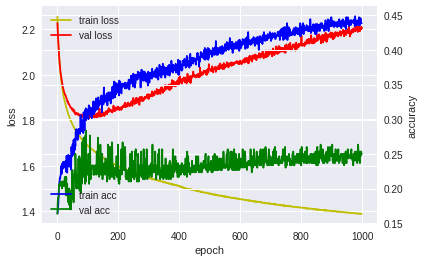

In [7]:
#5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()